



                                               Master ISID
                                                Dr Albert DIOMPY
                                                  2023-2024


# Package fanalysis

### Analyse en Composantes Principales
Ce travail a pour objectif de pr√©senter rapidement les principales fonctionnalit√©s offertes par le package fanalysis pour r√©aliser une Analyse en Composantes Principales.
Il suppose connu les soubassements th√©oriques de cette m√©thode.
Il ne s'attarde pas non plus sur l'interpr√©tation du jeu de donn√©es, qui n'a pour but que de pr√©senter les fonctionnalit√©s du package.
2 approches sont pr√©sent√©es :

- Une approche "datamining" : l'ACP vise √† d√©crire un jeu de donn√©es
- Une approche "machine learning" : l'ACP est utilis√©e comme m√©thode de r√©duction des donn√©es, le r√©sultat servant d'entr√©e pour un mod√®le pr√©dictif (nous ferons ici l'usage d'outils de scikit-learn).
### I. Approche Datamining
L'ACP a ici pour but de d√©crire un fichier de donn√©es.
Celui-ci est extrait du site de Ricco Rakotomalala (Universit√© Lyon 2) :
http://eric.univ-lyon2.fr/%7Ericco/tanagra/fichiers/autos_acp.xls
Nous partons d'un fichier texte intitul√© "pca_data.txt".
On importe la librairie pandas pour charger les donn√©es, ainsi que la classe PCA du package fanalysis.
Les donn√©es sont transform√©es en matrice de type numpy.ndarray.

Les donn√©es doivent se pr√©senter sous la forme d'une matrice de valeurs num√©riques.

In [11]:
import pandas as pd


In [12]:
pip install fanalysis

Note: you may need to restart the kernel to use updated packages.


In [13]:
from fanalysis.pca import PCA
%matplotlib inline

In [14]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [15]:
#Importation des indivus actives
#df=pd.read_excel('autos-acp-diapos.xls', sheet_name='ind. x var. actives', index_col=0)
df = pd.read_excel("Data_Methodes_Factorielles_python.xlsx",sheet_name="DATA_ACP_ACTIF",index_col=0) 
df

CYL  PUISS  LONG  LARG  POIDS  VMAX
Modele                                               
Alfasud TI       1350     79   393   161    870   165
Audi 100         1588     85   468   177   1110   160
Simca 1300       1294     68   424   168   1050   152
Citroen GS Club  1222     59   412   161    930   151
Fiat 132         1585     98   439   164   1105   165
Lancia Beta      1297     82   429   169   1080   160
Peugeot 504      1796     79   449   169   1160   154
Renault 16 TL    1565     55   424   163   1010   140
Renault 30       2664    128   452   173   1320   180
Toyota Corolla   1166     55   399   157    815   140
Alfetta 1.66     1570    109   428   162   1060   175
Princess 1800    1798     82   445   172   1160   158
Datsun 200L      1998    115   469   169   1370   160
Taunus 2000      1993     98   438   170   1080   167
Rancho           1442     80   431   166   1129   144
Mazda 9295       1769     83   440   165   1095   165
Opel Rekord      1979    100   459   173   1120   173
Lada 1300        1294     68   404   161    955   140

In [16]:
# info base
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CYL     18 non-null     int64
 1   PUISS   18 non-null     int64
 2   LONG    18 non-null     int64
 3   LARG    18 non-null     int64
 4   POIDS   18 non-null     int64
 5   VMAX    18 non-null     int64
dtypes: int64(6)
memory usage: 1008.0+ bytes


In [17]:
# statistiques descriptives 
df.describe()

CYL       PUISS        LONG        LARG        POIDS  \
count    18.000000   18.000000   18.000000   18.000000    18.000000   
mean   1631.666667   84.611111  433.500000  166.666667  1078.833333   
std     373.929846   20.376281   22.107358    5.313689   136.957808   
min    1166.000000   55.000000  393.000000  157.000000   815.000000   
25%    1310.250000   70.750000  424.000000  162.250000  1020.000000   
50%    1577.500000   82.000000  434.500000  167.000000  1087.500000   
75%    1797.500000   98.000000  448.000000  169.750000  1126.750000   
max    2664.000000  128.000000  469.000000  177.000000  1370.000000   

             VMAX  
count   18.000000  
mean   158.277778  
std     12.140383  
min    140.000000  
25%    151.250000  
50%    160.000000  
75%    165.000000  
max    180.000000

### ACP avec fanalysis
On cr√©e une instance de la classe PCA, en lui passant ici des √©tiquettes pour les lignes et les variables. Ces param√®tres sont facultatifs ; en leur absence, le programme d√©termine automatiquement des √©tiquettes.

Le constructeur de la classe PCA poss√®de un param√®tre sdt_unit qui indique si l'ACP est r√©alis√©e :

- √† partir de donn√©es centr√©es et r√©duites -> PCA(std_unit=True)
- √† partir de donn√©es centr√©es mais non r√©duites -> PCA(std_unit=False)

Par d√©faut, la valeur du param√®tre std_unit est fix√©e √† True, car c'est le cas le plus courant.

In [18]:
#Demander une ACP norm√©e
acp = PCA(std_unit=True, row_labels=df.index, col_labels=df.columns)
# acp √† partir de la matrice numpy
# On estime le mod√®le en appliquant la m√©thode fit de la classe PCA sur le jeu de donn√©es.
acp.fit(df.values)

PCA(col_labels=Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'VMAX'], dtype='object'),
    row_labels=Index(['Alfasud TI', 'Audi 100', 'Simca 1300', 'Citroen GS Club', 'Fiat 132',
       'Lancia Beta', 'Peugeot 504', 'Renault 16 TL', 'Renault 30',
       'Toyota Corolla', 'Alfetta 1.66', 'Princess 1800', 'Datsun 200L',
       'Taunus 2000', 'Rancho', 'Mazda 9295', 'Opel Rekord', 'Lada 1300'],
      dtype='object', name='Modele'))

L'ex√©cution de la m√©thode my_pca.fit(X) provoque a minima le calcul des attributs :

- my\_pca.eig\_ : valeurs propres
- my\_pca.row\_coord\_ : coordonn√©es des points lignes
- my\_pca.col\_coord\_ : coordonn√©es des points colonnes

### I.1. Analyse des valeurs propres
L'attribut my_pca.eig_ contient :

- en 1√®re ligne : les valeurs propres en valeur absolue
- en 2√®me ligne : les valeurs propres en pourcentage de la variance totale
- en 3√®me ligne : les valeurs propres en pourcentage cumul√© de la variance totale

In [19]:
# Affichage des valeurs propres
acp.eig_

array([[4.42085806e+00, 8.56062289e-01, 3.73066077e-01, 2.13922089e-01,
        9.28012120e-02, 4.32902727e-02],
       [7.36809677e+01, 1.42677048e+01, 6.21776796e+00, 3.56536815e+00,
        1.54668687e+00, 7.21504545e-01],
       [7.36809677e+01, 8.79486725e+01, 9.41664404e+01, 9.77318086e+01,
        9.92784955e+01, 1.00000000e+02]])

Les valeurs propres peuvent √™tre repr√©sent√©es graphiquement (par d√©faut : repr√©sentation en valeur absolue).

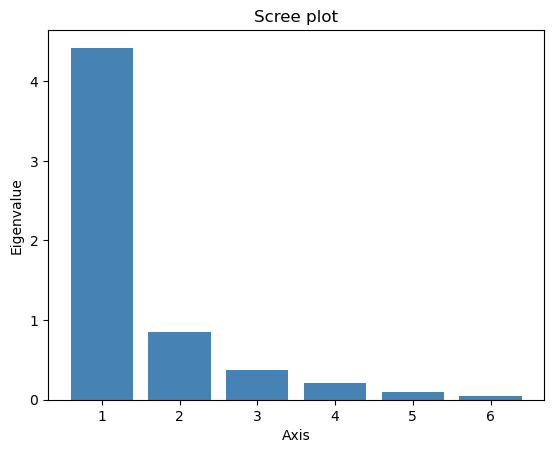

In [20]:
acp.plot_eigenvalues()

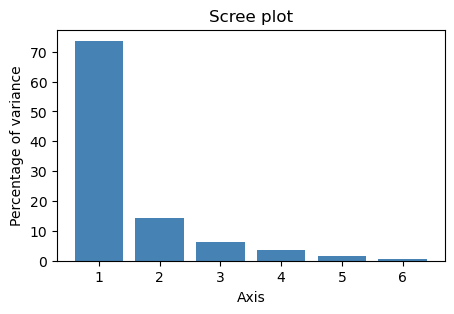

In [21]:
acp.plot_eigenvalues(type="percentage", figsize=(5,3))

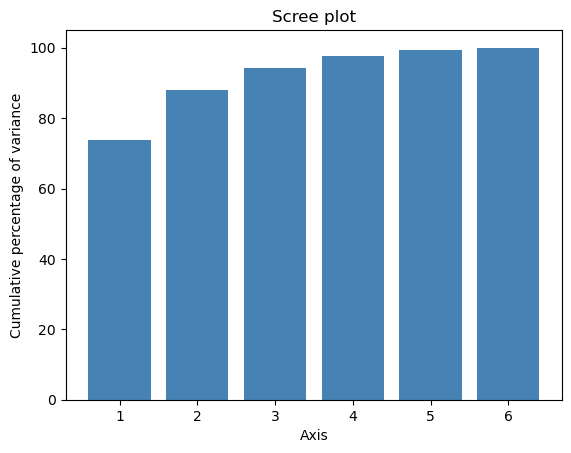

In [22]:
acp.plot_eigenvalues(type="cumulative")

#### L'examen des graphiques nous montre que les deux premiers facteurs contribuent √† 88% dans l'inertie totale. Cette analyse est confirm√©e par le graphique cumulative qui montre clairement que la jonction d'un facteur suppl√©mentaire n'am√©ne pas d'information significative.


### Informations sur les variables
 Cette partie apour objectif principale de caract√©riser des composantes par les variables c'est √† dire d'analyse des relations entre les variables via les composantes

Quand l'objet my\_pca a √©t√© instanci√©, son param√®tre stats a re√ßu la valeur True par d√©faut.
En cons√©quence, lors de l'ex√©cution de la m√©thode my\_pca.fit(X), les statistiques suivantes ont √©t√© calcul√©es :

- my\_pca.row\_contrib\_ : contributions des points lignes √† la variance de l'axe
- my\_pca.col\_contrib\_ : contributions des points colonnes √† la variance de l'axe
- my\_pca.row\_cos2\_ : cosinus carr√©s des points lignes
- my\_pca.col\_cos2\_ : cosinus carr√©s des points colonnes

Si l'on avait souhait√© √©viter le calcul de ces statistiques pour gagner du temps et √©conomiser des ressources m√©moire, il aurait fallu instancier :
my\_pca = PCA(stats=False)

Par d√©faut, les coordonn√©es des points lignes et colonnes, leurs contributions et cosinus carr√©s sont calcul√©s sur l'ensemble des axes extraits de l'analyse.
On aurait toutefois pu sp√©cifier le nombre d'axes √† retenir via le param√®tre n_components avec par exemple :
my\_pca = PCA(n_components=3)

 l'objet **acp.col_topandas()**  contient les informations globales sur les variables √† savoir:
 - les cordonn√©es des variables sur les axes qui repr√©sentent  les corr√©lations aux diff√©rents axes
 - contributions des variables √† la formations des axes 
 - la qualit√© de repr√©sentation des variables sur les axes 
 Ces informations sont essentielles dans l'interpr√©tation des des r√©sultats


In [23]:
info_var=acp.col_topandas()
info_var.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_contrib_dim1',
       'col_contrib_dim2', 'col_contrib_dim3', 'col_contrib_dim4',
       'col_contrib_dim5', 'col_contrib_dim6', 'col_cos2_dim1',
       'col_cos2_dim2', 'col_cos2_dim3', 'col_cos2_dim4', 'col_cos2_dim5',
       'col_cos2_dim6'],
      dtype='object')

In [24]:
# Coordon√©es des variables sur les 2 premiers axes
info_var[['col_coord_dim1','col_coord_dim2']]

col_coord_dim1  col_coord_dim2
CYL          0.893464       -0.114906
PUISS        0.886858       -0.384689
LONG         0.886155        0.381029
LARG         0.813536        0.412736
POIDS        0.905187        0.224532
VMAX         0.754710       -0.573519

Nous observons :
- Que toutes les variables d√©terminent plus ou moins le 1er facteur, avec des corr√©lations
√©lev√©es (toutes positives ici). On parle **d‚Äôeffet taille** dans ce type de situation. Une des
variables p√®se sur l‚Äôensemble des autres et masque les diff√©rences. En l‚Äô√©tat, on peut y voir une opposition entre les citadines (¬´ petites ¬ª voitures √† faible encombrement avec un moteur r√©duit) et les routi√®res (¬´ grosses ¬ª voitures
√† forte cylindr√©e). Le facteur traduit la ¬´ gamme ¬ª des v√©hicules.
- Pour le 2nd facteur, vu la corr√©lation avec VMAX, on peut le voir comme refl√©tant la
¬´ sportivit√© ¬ª des v√©hicules. On pourrait √™tre amen√© √† penser qu‚Äôil y a une opposition entre
(vitesse maximum) d‚Äôune part, (largeur) d‚Äôautre part. En r√©alit√©, il faut √™tre circonspect
parce que la lecture d√©pend de la position sur le premier facteur. 
En investiguant deux secondes, nous constatons que c‚Äôest une fausse impression que l‚Äôon ne retrouve absolument dans les nuages de points des variables prises deux √† deux (sns.pairplot(df))







In [25]:
import seaborn as sns
sns.pairplot(df)

**Remrque: Pour une meilleure lisibilit√©, on privil√©gie une vue synth√©tique avec le ¬´ cercle des
corr√©lations ¬ª. Ce sont les ¬´ directions ¬ª qui importent, d‚Äôo√π les fl√®ches dans la repr√©sentation
graphique. Elles permettront de comprendre les positions relatives des observations dans la
¬´ carte des individus ¬ª**

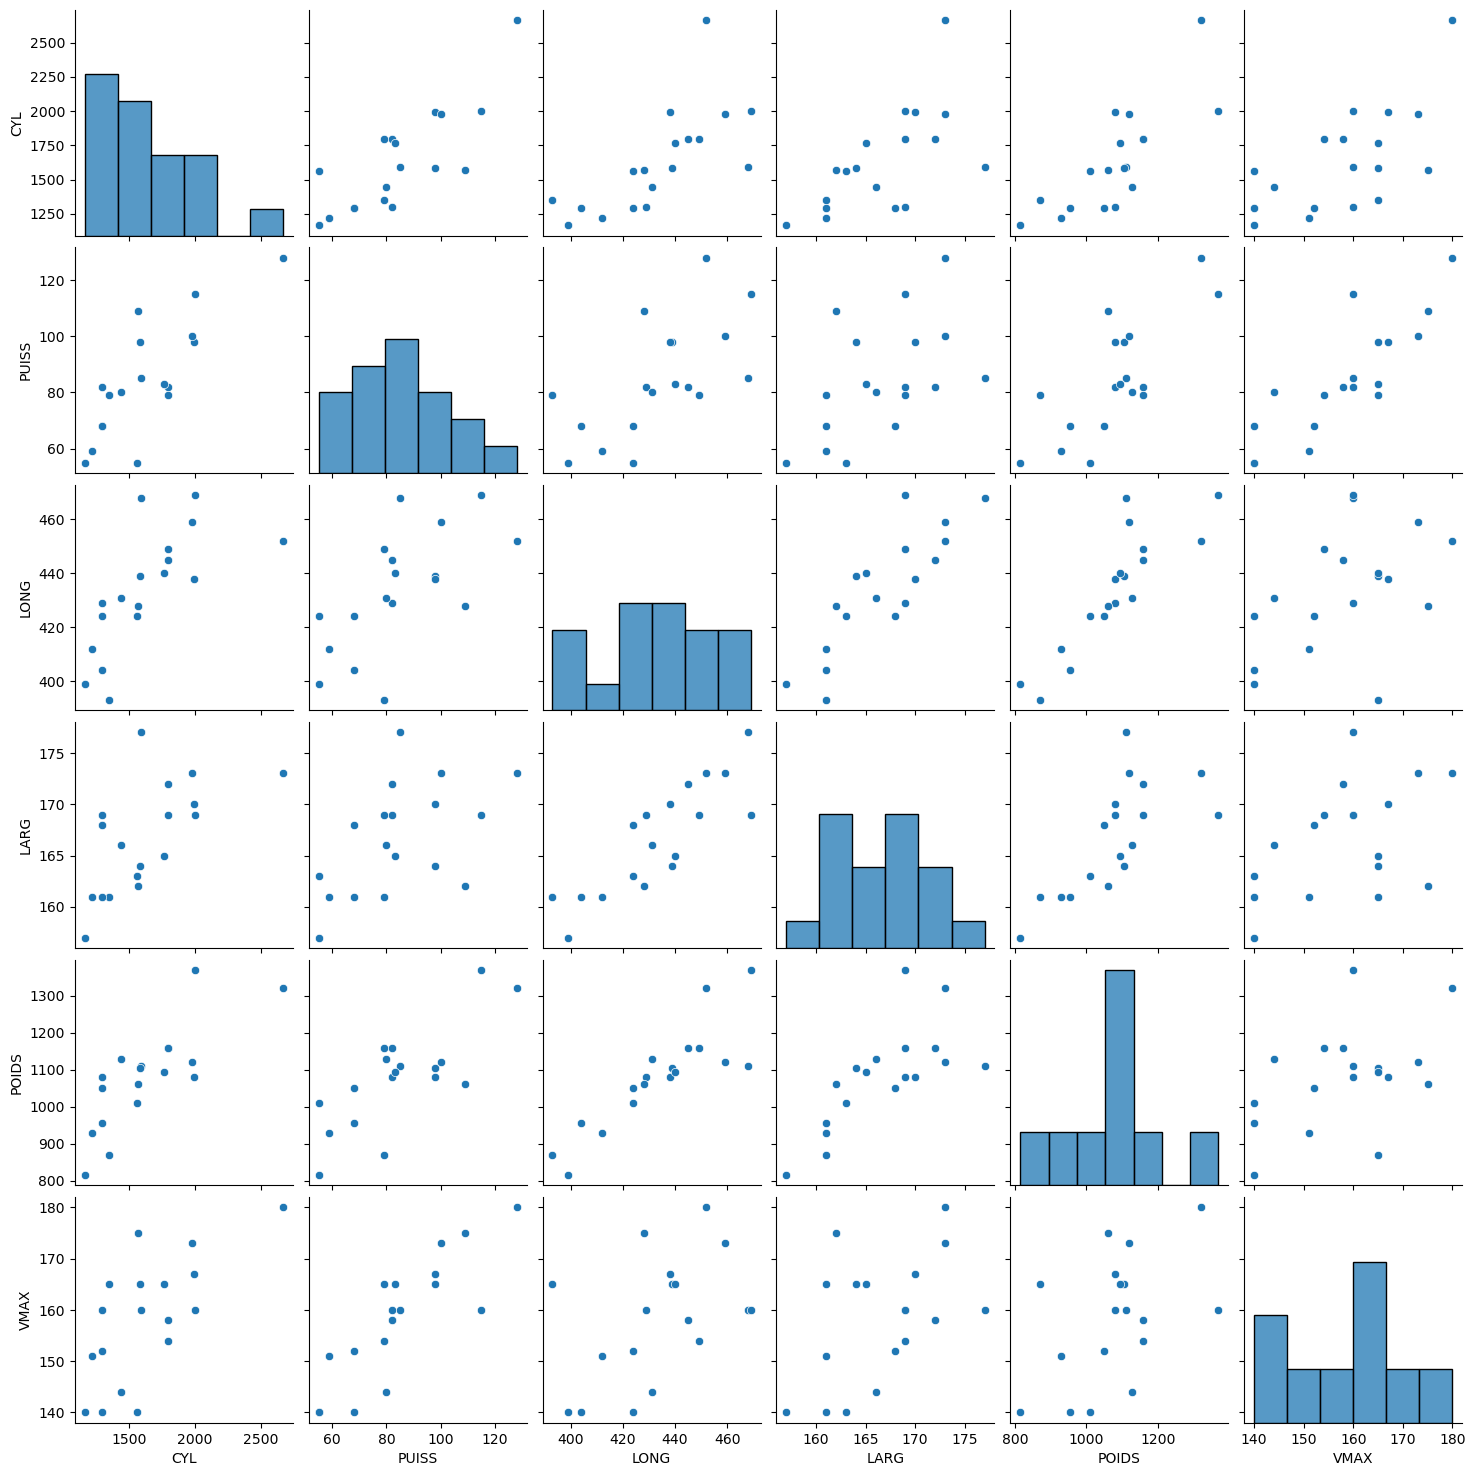

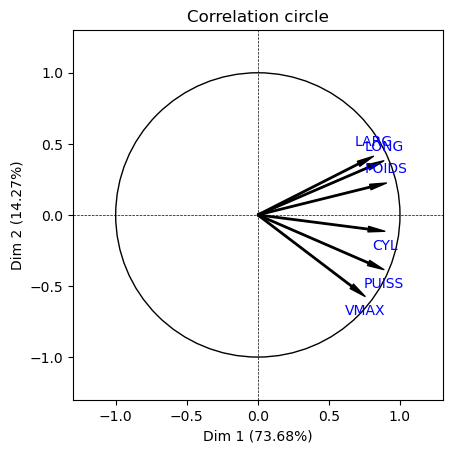

In [26]:
# Cercle de corr√©lation
acp.correlation_circle(num_x_axis=1, num_y_axis=2)

- Clairement ici, la cylindr√©e joue un r√¥le central (c‚Äôest le cas de le dire) en √©tant corr√©l√©e avec les
autres variables. 
- **Remarque:** Nous sommes dans une situation simple dans notre exemple. Les (q = 2) premiers
facteurs suffisent pour d√©crire les donn√©es. Sinon, il faudrait consid√©rer les repr√©sentations
factorielles par paires de composantes.

Cosinus2
. Le COS2 d√©signe la qualit√© de la repr√©sentation des variables (ùë•ùëó) sur une composante.
Elle correspond au carr√© du coefficient de corr√©lation, elle est d√©finie entre 0 et 1 :
### $$COS^2_{ùëóùëò} =r^2_{j}(ùêπùëò)$$
Il pr√©sente l‚Äôavantage de s‚Äôadditionner d‚Äôun facteur √† l‚Äôautre. Pour indiquer l‚Äôinformation de la
variable (ùë•ùëó) restitu√©e sur les (q) premiers facteurs, nous faisons : 
### $$\Sigma_{k=1}^{q}COS^2_{jk}$$
Et lorsque nous consid√©rons l‚Äôensemble des (p) facteurs, nous avons capt√© toute l‚Äôinformation
port√©e par une variable :
### $$\Sigma_{k=1}^{p}COS^2_{jk}=1$$



In [44]:
# les cosinus2 pour la qualit√© de repr√©sentation
info_var[['col_cos2_dim1','col_cos2_dim2']]

col_cos2_dim1  col_cos2_dim2
CYL         0.798277       0.013203
PUISS       0.786517       0.147986
LONG        0.785270       0.145183
LARG        0.661841       0.170351
POIDS       0.819364       0.050415
VMAX        0.569588       0.328925

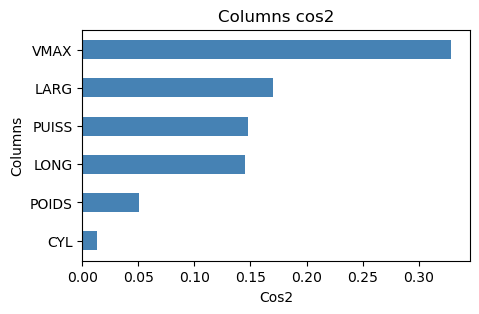

In [28]:
# On obtient le graphique sur le deuxi√®me en changeant 1 par 2
acp.plot_col_cos2(num_axis=2, figsize=(5,3))


In [29]:
# Cumul des cosinus2 sur les deux premiers facteurs
info_var[['col_cos2_dim1','col_cos2_dim2']].cumsum(axis=1)

col_cos2_dim1  col_cos2_dim2
CYL         0.798277       0.811481
PUISS       0.786517       0.934503
LONG        0.785270       0.930453
LARG        0.661841       0.832192
POIDS       0.819364       0.869779
VMAX        0.569588       0.898512

**Pour notre √©tude ¬´ Autos ¬ª, mis √† part VMAX et LARG, toutes les variables sont bien repr√©sent√©es
d√®s le 1er facteur. Nous avons √©puis√© quasiment toute l‚Äôinformation port√©e par chaque variable
d√®s le 2nd facteur puisque, dans le pire des cas, nous avons au moins restitu√© 81% de l‚Äôinformation
disponible (CYL).**

### Contributions
 Les contributions mat√©rialisent l‚Äôinfluence d‚Äôune variable dans la d√©finition de
chaque composante. Elles sont bas√©es √©galement sur le carr√© des corr√©lations, mais normalis√©es
afin que leurs sommes sur chaque composante soit √©gale √† 1.
Sachant que :
### $$\Sigma_{k=1}^{p}r^2_{j}(F_{k})=\lambda_{k}$$
La contribution de la variable (ùë•ùëó) au facteur (Fk) s‚Äô√©crit :
### $$CRT_{jk}=\frac{r^2_{j}(F_{k})}{\lambda_{k}}$$

In [30]:
# Contribution des variables 
info_var[['col_contrib_dim1','col_contrib_dim2']]

col_contrib_dim1  col_contrib_dim2
CYL           18.057062          1.542342
PUISS         17.791052         17.286793
LONG          17.762847         16.959384
LARG          14.970882         19.899361
POIDS         18.534057          5.889155
VMAX          12.884099         38.422964

**Sans surprise, les variables les plus corr√©l√©es avec les facteurs sont celles qui p√®sent le plus
dans leur d√©finition.**

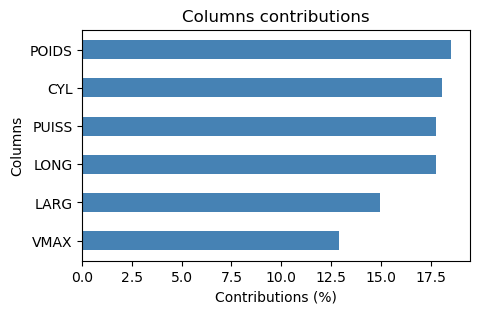

In [31]:
# On obtient le graphique sur le deuxi√®me en changeant 1 par 2
acp.plot_col_contrib(num_axis=1, figsize=(5,3))


#### Remarque 1:
**En analyse en composantes principales, les COS2 et CTR apportent peu dans
l‚Äôinterpr√©tation des r√©sultats par rapport √† la corr√©lation des variables aux facteurs. En effet,
cette derni√®re √©tant born√©e entre -1 et +1, elle permet d√©j√† des comparaisons directes.**
#### Remarque 2:
 **Lors de la reconstitution des corr√©lations dans l‚Äôespace factoriel,
l‚Äôapproximation sera d‚Äôautant meilleure que les COS2 des variables trait√©es seront √©lev√©s.**

### Informations sur les individus
**les informations sur les individus √† l'image des variables se r√©sument √† leurs coordonn√©es sur les axes, leurs contributions et √† leurs cosinus2**

In [32]:
# Coordonn√©es et autres informations
info_indiv=acp.row_topandas()
info_var.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_contrib_dim1',
       'col_contrib_dim2', 'col_contrib_dim3', 'col_contrib_dim4',
       'col_contrib_dim5', 'col_contrib_dim6', 'col_cos2_dim1',
       'col_cos2_dim2', 'col_cos2_dim3', 'col_cos2_dim4', 'col_cos2_dim5',
       'col_cos2_dim6'],
      dtype='object')

In [33]:
# Coordon√©es des individus sur les 2 premiers axes
info_indiv[['row_coord_dim1','row_coord_dim2']]

row_coord_dim1  row_coord_dim2
Modele                                         
Alfasud TI            -2.138924       -1.785681
Audi 100               1.561459        1.527040
Simca 1300            -1.119385        0.674505
Citroen GS Club       -2.573742       -0.112884
Fiat 132               0.427855       -0.695567
Lancia Beta           -0.304238        0.196149
Peugeot 504            0.683928        0.933057
Renault 16 TL         -1.948493        0.980448
Renault 30             4.409735       -1.063633
Toyota Corolla        -3.985782       -0.236240
Alfetta 1.66           0.437658       -1.912448
Princess 1800          1.018175        0.841712
Datsun 200L            2.941080        0.559175
Taunus 2000            1.314880       -0.486522
Rancho                -0.691111        0.897721
Mazda 9295             0.385709       -0.356185
Opel Rekord            2.289768       -0.104345
Lada 1300             -2.708574        0.143699

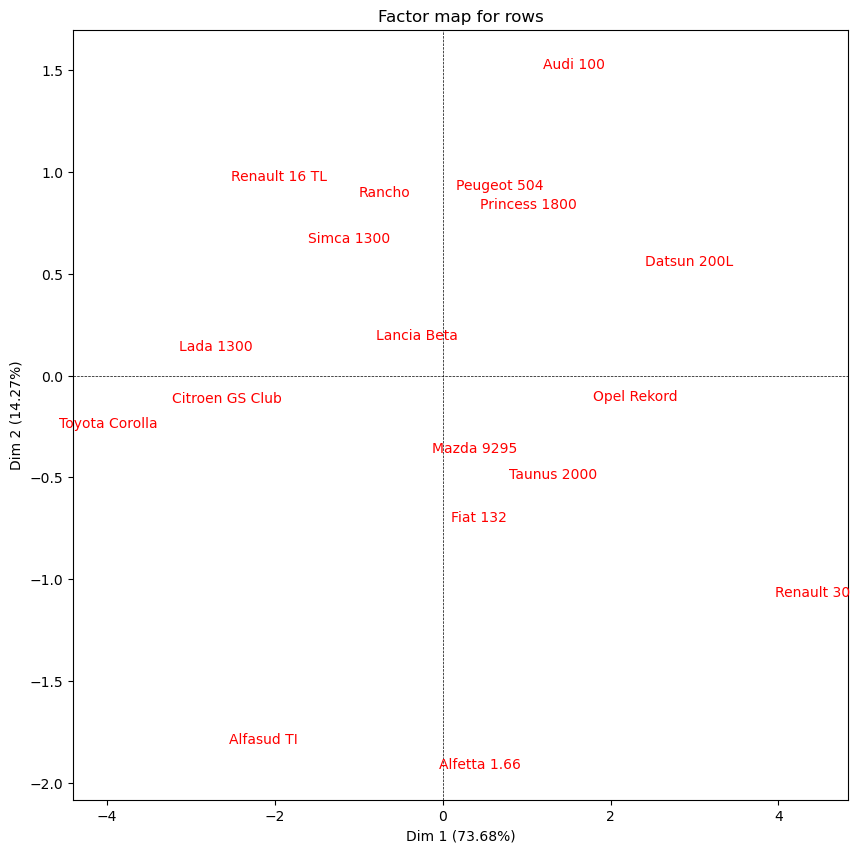

In [34]:
#carte des individus
acp.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(10,10))

**Sans indications des variabilit√©s des axes, nous serions tent√©s de dire que :**
- **l‚Äô√©cart entre la Simca 1300 et la Lancia Beta se joue plus sur l‚Äôordonn√©e (Dim 2) que sur
l‚Äôabscisse (Dim 1)**
- **la Peugeot 504 est √† √©gale distance de l‚ÄôAudi 100 et de la Datsun 200L.**
**Or, ces deux assertions s‚Äôav√®rent fausses si l‚Äôon proc√®de aux calculs √† partir des coordonn√©es
factorielles. En effet (les coordonn√©es sont visibles dans la sortie Python ci-dessus) :**
### $$ùëë^2(ùëÜùëñùëöùëêùëé, ùêøùëéùëõùëêùëñùëé) = (‚àí1.12 ‚àí (‚àí0.30))^2+ (0.67 ‚àí 0.20)^2 = 0.66 + 0.23 = 0.89 $$
**ceci montre que l‚Äô√©cart se fait plus sur le 1er facteur que sur le 2nd en r√©alit√©.**

### $$ùëë^2(ùê¥ùë¢ùëëùëñ, 504) = (1.56 ‚àí 0.68)^2 + (1.53 ‚àí 0.93)^2 = 1.12$$  $$ùëë^2(ùê∑ùëéùë°ùë†ùë¢ùëõ, 504) = (2.94 ‚àí0.68)^2 + (0.56 ‚àí 0.93)^2 = 5.23$$
**la Datsun s‚Äôav√®re nettement plus √©loign√©e de la 504 que
ne l‚Äôest l‚ÄôAudi 100, on le per√ßoit visuellement uniquement si l‚Äôon a int√©gr√© que la
dispersion est plus forte sur le 1er facteur.**

**Attention! Les librairies graphiques proc√®dent quasiment toujours √† une mise √† l‚Äô√©chelle
automatique pour que les points ¬´ remplissent ¬ª au mieux le canevas de pr√©sentation. De fait,
la lecture doit tenir compte des proportions de variance expliqu√©es en abscisse (73.68%) et en
ordonn√©e (14.27%) pour √©viter les conclusions intempestives.**

**C‚Äôest pour cette raison que je pr√©conise syst√©matiquement de fixer la m√™me √©chelle en abscisse
et en ordonn√©e des graphiques factoriels. Les positions relatives sont alors ramen√©es √† de plus
justes proportions, et refl√®tent plus fid√®lement les √©carts et leur nature.**


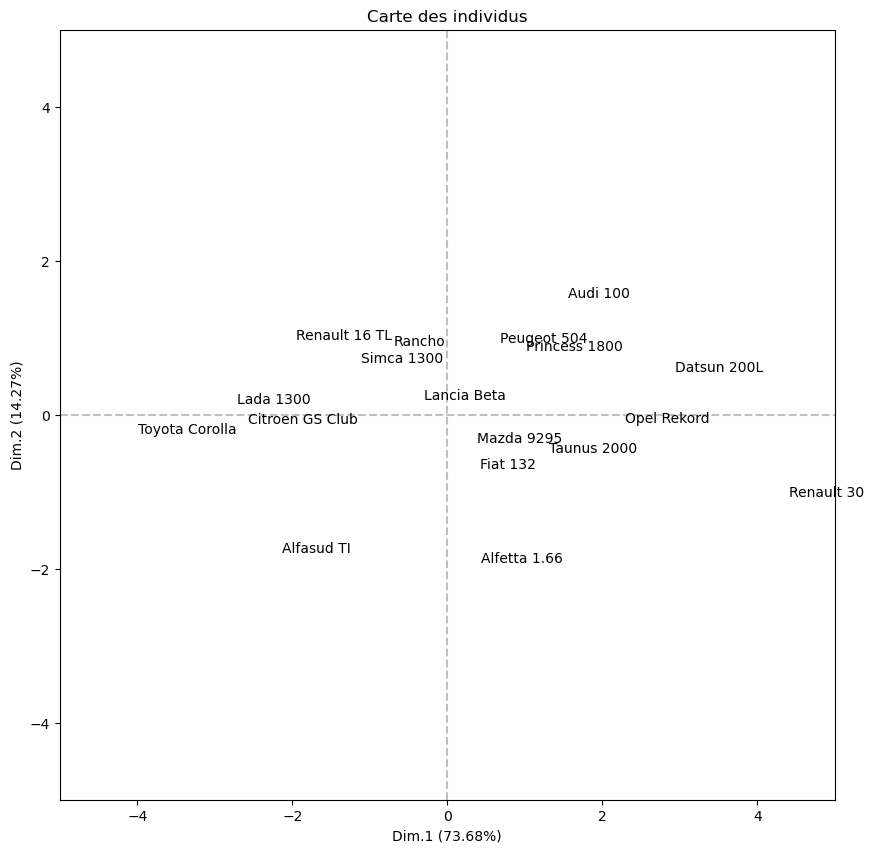

In [35]:
import matplotlib.pyplot as plt
coord= info_indiv[['row_coord_dim1','row_coord_dim2']]
#graphique avec les √©chelles carr√©es
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (73.68%)")
ax.set_ylabel("Dim.2 (14.27%)")
plt.title("Carte des individus")
for i in range(coord.shape[0]):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],coord.index[i])

plt.show()

### Projection des individus suppl√©mentaires
La projection des individus suppl√©mentaires (ou illustratifs selon la finalit√© poursuivie) est une
fonctionnalit√© importante de l‚Äôanalyse en composantes principales. L‚Äôobjectif est de positionner
de nouveau individus par rapport √† ceux (les individus actifs, l‚Äô√©chantillon d‚Äôapprentissage,
l‚Äô√©chantillon de r√©f√©rence) qui ont contribu√© √† la construction du rep√®re factoriel.
On peut voir plusieurs motivations √† cette d√©marche :
- Situer les positions des individus qui ont √©t√© collect√©s apr√®s coup.
- Identifier parmi ces individus ceux dont les caract√©ristiques diff√®rent significativement
de l‚Äô√©chantillon de r√©f√©rence. On parle de d√©tection de nouveaut√©s (novelty detection,
¬´ D√©tection des anomalies sous Python ¬ª, mars 2020).
- Positionner des individus appartenant √† une population diff√©rente ou sp√©cifique
- Int√©grer apr√®s coup les observations jug√©es trop atypiques ou influentes, qui √©taient
susceptibles de fausser la construction du rep√®re factoriel. On aurait pu √©carter la
Renault 30 des calculs par exemple, du fait de son influence tr√®s marqu√©e sur les 2
premiers facteurs, puis l‚Äôajouter comme individu suppl√©mentaire par la suite.

In [45]:
#df1=pd.read_excel('autos-acp-diapos.xls', sheet_name='ind.illustratives', index_col=0)
df1 = pd.read_excel("Data_Methodes_Factorielles_python.xlsx",sheet_name="DATA_ACP_IND_SUP",index_col=0) 
df1

CYL  PUISS  LONG  LARG  POIDS  VMAX
Modele                                             
Peugeot 604    2664    136   472   177   1410   180
Peugeot 304 S  1288     74   414   157    915   160

In [46]:
df1.index

Index(['Peugeot 604', 'Peugeot 304 S'], dtype='object', name='Modele')

In [47]:
#df_ind_supp=df1.drop(index=['Alfasud TI', 'Audi 100', 'Simca 1300', 'Citroen GS Club', 'Fiat 132',
#       'Lancia Beta', 'Peugeot 504', 'Renault 16 TL', 'Renault 30',
#       'Toyota Corolla', 'Alfetta 1.66', 'Princess 1800', 'Datsun 200L',
#       'Taunus 2000', 'Rancho', 'Mazda 9295', 'Opel Rekord', 'Lada 1300'], axis=0)
df_ind_supp = df1

**On conna√Æt bien ces v√©hicules (304 S, petite sportive ; 604, routi√®re statutaire), on imagine tr√®s
bien leurs voisinages respectifs. Voyons si l‚ÄôACP saura les positionner correctement.
La fonction ¬´ .transform() ¬ª de l‚Äôobjet PCA fait merveille ici, nous pouvons lui envoyer la
description brute des individus suppl√©mentaires, sans pr√©paration pr√©alable. Nous obtenons les
coordonn√©es factorielles (2 observations, p = 6 facteurs).**

In [48]:
#coordonn√©es factorielles des individus suppl√©mentaires
coordSup = acp.transform(df_ind_supp.values)
print(coordSup)

[[ 5.56329226 -0.33860928  0.46428878 -0.40214608  0.38981076  0.08102064]
 [-2.21224139 -1.25777905  0.09304388  0.35370189 -0.648528   -0.12473042]]


**Nous les pla√ßons dans le plan factoriel pour localiser leurs voisinages parmi les observations
actives**

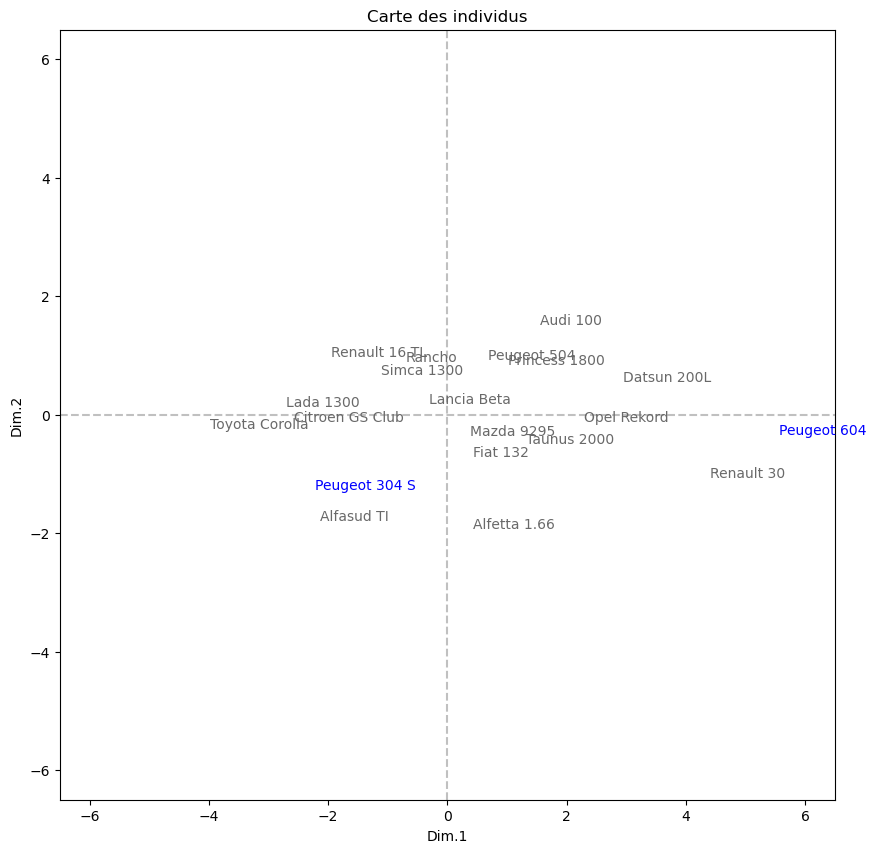

In [49]:
#position des points suppl√©mentaires dans le plan
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-6.5,+6.5,-6.5,+6.5])
ax.plot([-6.5,+6.5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-6.5,+6.5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des individus")
#points actifs
for i in range(coord.shape[0]):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],coord.index[i],color="dimgray")
#points illutratifs
for i in range(df_ind_supp.shape[0]):
 ax.text(coordSup[i,0],coordSup[i,1],df_ind_supp.index[i],color="blue")

plt.show()


**le plot nous montre clairement  la ¬´ 304 S ¬ª est une petite sportive, a l‚Äôinstar de l‚ÄôAlfasud TI (premi√®re version). Quant √† la 604, elle √©tait bien une concurrente directe de la Renault 30. Ces r√©sultats confortent la
l√©gitimit√© des r√©sultats de l‚ÄôACP men√©e sur les donn√©es ¬´ Autos ¬ª.**

### Variables illustratives quantitatives
**Les variables illustratives ont pour vocation de renforcer l‚Äôinterpr√©tation des composantes. Elles
ne sont pas utilis√©es pour leur construction, elles interviennent seulement apr√®s coup pour
mieux comprendre et commenter les r√©sultats. Pour l‚Äôexemple des donn√©es ¬´ Autos ¬ª, nous
avons utilis√© en variables actives les caract√©ristiques intrins√®ques des v√©hicules (largeur, poids,
puissance, etc.) pour √©laborer les facteurs. Nous nous appuyons ensuite sur des variables
illustratives int√©grant des consid√©rations subjectives (prix, finition) ou calcul√©es ex-post (rapport poids-puissance) pour ent√©riner leurs positions relatives dans la repr√©sentation factorielle.**

In [50]:
#Pour les donn√©es ¬´ autos-acp-diapo ¬ª, nous chargeons la 2√®me feuille de calcul compos√©e des variables
#illustratives pour les m√™mes (n = 18) v√©hicules.
#df2=pd.read_excel('autos-acp-diapos.xls', sheet_name='var.illustratives', index_col=0)
df2 = pd.read_excel("Data_Methodes_Factorielles_python.xlsx",sheet_name="DATA_ACP_VAR_ILLUS",index_col=0) 
df2

FINITION   PRIX  RPOIDPUIS
Modele                                    
Alfasud TI           2_B  30570  11.012658
Audi 100            3_TB  39990  13.058824
Simca 1300           1_M  29600  15.441176
Citroen GS Club      1_M  28250  15.762712
Fiat 132             2_B  34900  11.275510
Lancia Beta         3_TB  35480  13.170732
Peugeot 504          2_B  32300  14.683544
Renault 16 TL        2_B  32000  18.363636
Renault 30          3_TB  47700  10.312500
Toyota Corolla       1_M  26540  14.818182
Alfetta-1.66        3_TB  42395   9.724771
Princess-1800        2_B  33990  14.146341
Datsun-200L         3_TB  43980  11.913043
Taunus-2000          2_B  35010  11.020408
Rancho              3_TB  39450  14.112500
Mazda-9295           1_M  27900  13.192771
Opel-Rekord          2_B  32700  11.200000
Lada-1300            1_M  22100  14.044118

In [51]:

#df_var_illus=df2.drop(columns=['CYL', 'PUISS', 'LONG', 'LARG',
#       'POIDS', 'V.MAX'])
df_var_illus = df2

In [52]:
df_var_illus=df_var_illus.rename(columns = {'R.POID.PUIS': 'RPOIDPUIS'})
df_var_illus

FINITION   PRIX  RPOIDPUIS
Modele                                    
Alfasud TI           2_B  30570  11.012658
Audi 100            3_TB  39990  13.058824
Simca 1300           1_M  29600  15.441176
Citroen GS Club      1_M  28250  15.762712
Fiat 132             2_B  34900  11.275510
Lancia Beta         3_TB  35480  13.170732
Peugeot 504          2_B  32300  14.683544
Renault 16 TL        2_B  32000  18.363636
Renault 30          3_TB  47700  10.312500
Toyota Corolla       1_M  26540  14.818182
Alfetta-1.66        3_TB  42395   9.724771
Princess-1800        2_B  33990  14.146341
Datsun-200L         3_TB  43980  11.913043
Taunus-2000          2_B  35010  11.020408
Rancho              3_TB  39450  14.112500
Mazda-9295           1_M  27900  13.192771
Opel-Rekord          2_B  32700  11.200000
Lada-1300            1_M  22100  14.044118

**L‚Äôid√©e est de conforter les r√©sultats de l‚ÄôACP avec ces nouvelles variables. Les indicateurs utilis√©s
ne sont pas les m√™mes selon qu‚Äôelles sont quantitatives ou qualitatives.**



**La corr√©lation avec les facteurs est l‚Äôindicateur naturel pour positionner une
variable suppl√©mentaire quantitative dans le rep√®re factoriel. Si (y) est la variable √† analyser, le
coefficient s‚Äô√©crit :**

### $$r_{y}(F_{k})=\frac{\frac{1}{n}\Sigma(y_{i}-\bar{y})(F_{ik}-\bar{F_{k})}}{\sigma_{y}*\sigma_{F_{k}}}=\frac{\frac{1}{n}\Sigma(y_{i}-\bar{y})F_{ik}}{\sigma_{y}*\sqrt \lambda_{k}}$$
**En pratique, il s‚Äôagit de faire simplement appel aux librairies de calcul du langage utilis√©. Sous
Python, nous utilisons corrcoef() de ¬´ Numpy ¬ª. Pour ¬´ prix ¬ª et ¬´ rapport poids-puissance ¬ª
sur les deux premiers facteurs, nous avons :**

In [53]:
import numpy as np
#corr√©lation de PRIX avec les 2 premiers facteurs
cPrix = np.corrcoef(df_var_illus.PRIX,acp.row_coord_[:,:2],rowvar=False)[0,1:]
print(cPrix)


[ 0.77247524 -0.08670844]


In [54]:
#corr√©lation de RPOIDPUIS avec les 2 premiers facteurs
cRPP = np.corrcoef(df_var_illus.RPOIDPUIS,acp.row_coord_[:,:2],rowvar=False)[0,1:]
print(cRPP)

[-0.58903888  0.67254512]



- **Le prix est fortement li√© positivement au premier facteur, lequel est d√©termin√© par la
cylindr√©e et l‚Äôencombrement des v√©hicules. Ce n‚Äôest pas vraiment √©tonnant.**
- **Le rapport poids puissance est un indicateur de performance. Plus il est faible, plus sportif
est le v√©hicule. Il est quasi-√©galement li√© aux deux facteurs : n√©gativement au premier, c‚Äôest
tout √† fait naturel puisque cette composante traduit la cylindr√©e et la puissance ;
positivement au second, en opposition √† la vitesse maximum, ce que se con√ßoit tr√®s bien.
Ins√©rer ces variables dans le cercle des corr√©lations donne une vision synth√©tique toujours bien
sympathique.**

In [56]:
#placement des variables illustratives dans le cercle des corr√©lations
fig, ax = plt.subplots(figsize=(5,5))
ax.axis([-1,+1,-1,+1])
ax.plot([-1,+1],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1,+1],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Cercle des corr√©lations")
#variables actives
for i in range(df.shape[1]):
 ax.text(acp.col_coord_[i,0],acp.col_coord_[i,1],df.columns[i],color="dimgray")
#variables illustratives
ax.text(cPrix[0],cPrix[1],'PRIX',color='brown')
ax.arrow(0,0,cPrix[0]-0.1,cPrix[1]+0.04,color='r',head_width=0.05)
ax.text(cRPP[0],cRPP[1],'RPOIDPUIS',color="red")
ax.arrow(0,0,cRPP[0]+0.2,cRPP[1]-0.1,color='r',head_width=0.05)


- **Le traitement des variables illustratives qualitatives s‚Äôapparente √† une analyse de variance √† 1
facteur : l‚Äôobjectif est d‚Äôappr√©cier dans quelle mesure les moyennes
conditionnelles d√©finies par les groupes associ√©s aux modalit√©s sont suffisamment √©cart√©es sur
le facteur √©tudi√©.** 

- **Nous disposons d‚Äôun indicateur global, le carr√© du rapport de corr√©lation ; et
d‚Äôun indicateur par groupe, la valeur test (¬´ Interpr√©ter la valeur-test ¬ª, avril 2008).**
- **Moyennes conditionnelles ‚Äì Coordonn√©es factorielles. Les moyennes conditionnelles (ùë¶ÃÖùëîùëò)
constituent le point de d√©part de l‚Äôanalyse, o√π ¬´ g ¬ª d√©signe une des modalit√©s de la variable
suppl√©mentaire (y, √† G cat√©gories), ¬´ k ¬ª le facteur sur lequel nous travaillons.**

### $$\bar Y_{gk}=\frac{1}{n_{g}}\Sigma_{i:y_{i}=g}F_{ik}$$

##### O√π (ng) est l‚Äôeffectif du groupe ¬´ g ¬ª.
Concr√®tement, pour la variable illustrative FINITION sur le premier facteur, nous calculons les
effectifs par groupe et les moyennes conditionnelles.

In [57]:
#data frame temporaire
df3 = df_var_illus.copy()
df3['F1'] = acp.row_coord_[:,0]
df3['F2'] = acp.row_coord_[:,1]

In [58]:
df3

FINITION   PRIX  RPOIDPUIS        F1        F2
Modele                                                        
Alfasud TI           2_B  30570  11.012658 -2.138924 -1.785681
Audi 100            3_TB  39990  13.058824  1.561459  1.527040
Simca 1300           1_M  29600  15.441176 -1.119385  0.674505
Citroen GS Club      1_M  28250  15.762712 -2.573742 -0.112884
Fiat 132             2_B  34900  11.275510  0.427855 -0.695567
Lancia Beta         3_TB  35480  13.170732 -0.304238  0.196149
Peugeot 504          2_B  32300  14.683544  0.683928  0.933057
Renault 16 TL        2_B  32000  18.363636 -1.948493  0.980448
Renault 30          3_TB  47700  10.312500  4.409735 -1.063633
Toyota Corolla       1_M  26540  14.818182 -3.985782 -0.236240
Alfetta-1.66        3_TB  42395   9.724771  0.437658 -1.912448
Princess-1800        2_B  33990  14.146341  1.018175  0.841712
Datsun-200L         3_TB  43980  11.913043  2.941080  0.559175
Taunus-2000          2_B  35010  11.020408  1.314880 -0.486522
Rancho              3_TB  39450  14.112500 -0.691111  0.897721
Mazda-9295           1_M  27900  13.192771  0.385709 -0.356185
Opel-Rekord          2_B  32700  11.200000  2.289768 -0.104345
Lada-1300            1_M  22100  14.044118 -2.708574  0.143699

In [59]:
#effectif par groupe de FINITION
n_g = pd.pivot_table(df3,values='F1',index='FINITION',aggfunc='count')
print(n_g)

          F1
FINITION    
1_M        5
2_B        7
3_TB       6


In [60]:
#moyennes conditionnelles pour le 1er facteur
m_1 = pd.pivot_table(df3,values='F1',index='FINITION',aggfunc='mean')
print(m_1)


                F1
FINITION          
1_M      -2.000355
2_B       0.235313
3_TB      1.392430


In [61]:
#moyennes conditionnelles pour le 2nd facteur
m_2 = pd.pivot_table(df3,values='F2',index='FINITION',aggfunc='mean')
print(m_2)

                F2
FINITION          
1_M       0.022579
2_B      -0.045271
3_TB      0.034001


**Ces moyennes conditionnelles correspondent √©galement aux coordonn√©es factorielles. Pla√ßonsles dans notre rep√®re pour disposer d‚Äôune vision d‚Äôensemble.**

/tmp/ipykernel_73323/40778519.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(m_1.F1[g],m_2.F2[g],m_1.index[g],color="red",weight="bold",fontsize=16)


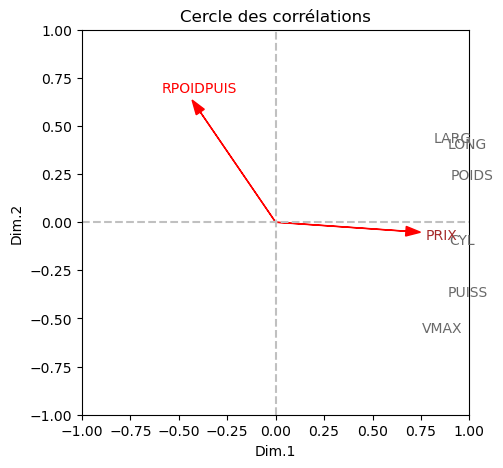

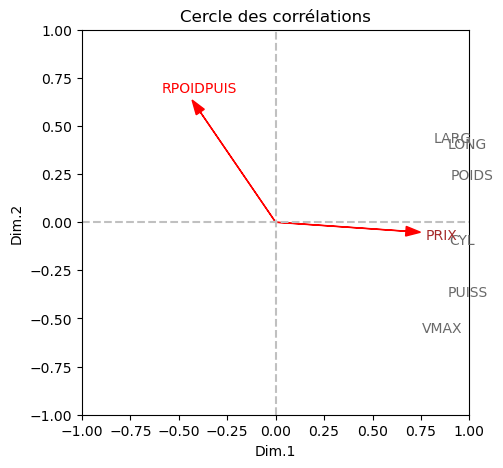

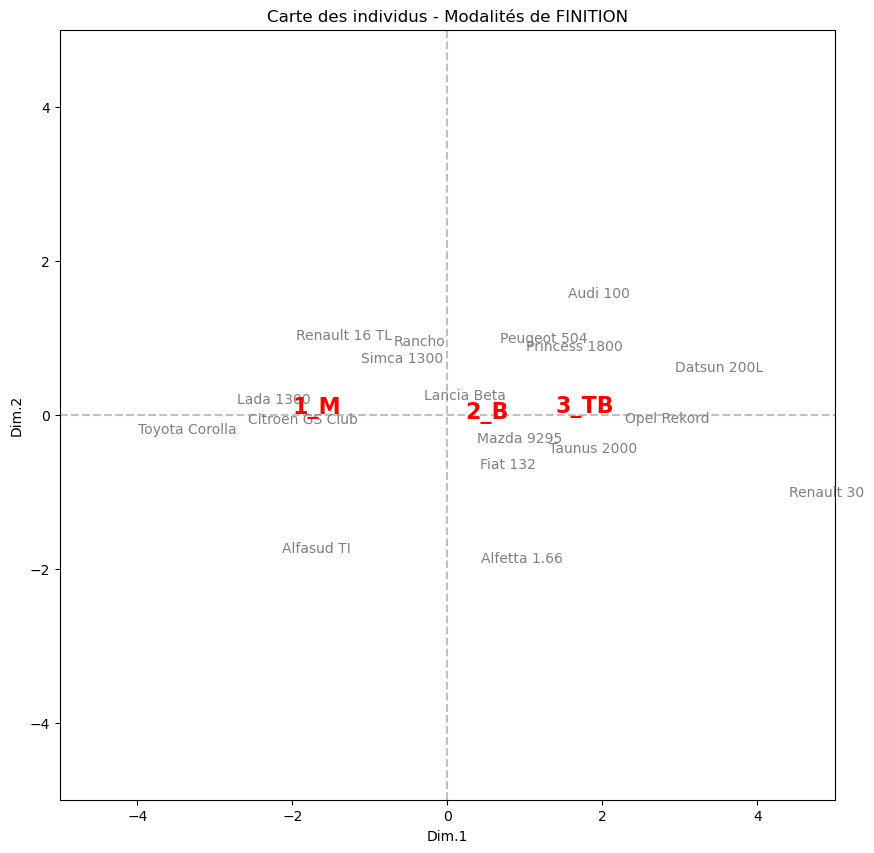

In [62]:
#repr√©sentation graphique avec les positions
#des points suppl√©mentaires dans le plan
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des individus - Modalit√©s de FINITION")
#points actifs
for i in range(coord.shape[0]):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],coord.index[i],color="gray")

#position des modalit√©s de la variable illustrative
for g in range(len(m_1.index)):
 ax.text(m_1.F1[g],m_2.F2[g],m_1.index[g],color="red",weight="bold",fontsize=16)

plt.show()

**Manifestement, les niveaux de FINITION se distingue fortement sur le 1er facteur, quasiment
pas sur le 2nd.Elle (la finition) est intimement li√©e √† la notion de ¬´ gamme ¬ª de v√©hicules mis en
avant lors de la lecture des facteurs. Plus le v√©hicule monte en gamme, plus √©lev√© est le niveau
de finition.**

### II. Approche Machine Learning
Ici, l'objectif est d'utiliser l'Analyse en Composantes Principales en tant que m√©thode de pr√©traitement.

La classe PCA impl√©mente les m√©thodes fit, transform et fit_transform bien connues des utilisateurs de scikit-learn.

Il est ici judicieux de fixer le param√®tre stats √† False pour gagner en temps de traitement et en ressources m√©moire.

In [ ]:
df2

FINITION   PRIX  R.POID.PUIS   CYL  PUISS  LONG  LARG  POIDS  \
Modele                                                                         
Alfasud TI           2_B  30570    11.012658  1350     79   393   161    870   
Audi 100            3_TB  39990    13.058824  1588     85   468   177   1110   
Simca 1300           1_M  29600    15.441176  1294     68   424   168   1050   
Citroen GS Club      1_M  28250    15.762712  1222     59   412   161    930   
Fiat 132             2_B  34900    11.275510  1585     98   439   164   1105   
Lancia Beta         3_TB  35480    13.170732  1297     82   429   169   1080   
Peugeot 504          2_B  32300    14.683544  1796     79   449   169   1160   
Renault 16 TL        2_B  32000    18.363636  1565     55   424   163   1010   
Renault 30          3_TB  47700    10.312500  2664    128   452   173   1320   
Toyota Corolla       1_M  26540    14.818182  1166     55   399   157    815   
Alfetta-1.66        3_TB  42395     9.724771  1570    109   428   162   1060   
Princess-1800        2_B  33990    14.146341  1798     82   445   172   1160   
Datsun-200L         3_TB  43980    11.913043  1998    115   469   169   1370   
Taunus-2000          2_B  35010    11.020408  1993     98   438   170   1080   
Rancho              3_TB  39450    14.112500  1442     80   431   166   1129   
Mazda-9295           1_M  27900    13.192771  1769     83   440   165   1095   
Opel-Rekord          2_B  32700    11.200000  1979    100   459   173   1120   
Lada-1300            1_M  22100    14.044118  1294     68   404   161    955   

                 V.MAX  
Modele                  
Alfasud TI         165  
Audi 100           160  
Simca 1300         152  
Citroen GS Club    151  
Fiat 132           165  
Lancia Beta        160  
Peugeot 504        154  
Renault 16 TL      140  
Renault 30         180  
Toyota Corolla     140  
Alfetta-1.66       175  
Princess-1800      158  
Datsun-200L        160  
Taunus-2000        167  
Rancho             144  
Mazda-9295         165  
Opel-Rekord        173  
Lada-1300          140

In [ ]:
# posons X la matrice des variables explicatives
X = df2.iloc[:, 3:9].values
X

array([[1350,   79,  393,  161,  870,  165],
       [1588,   85,  468,  177, 1110,  160],
       [1294,   68,  424,  168, 1050,  152],
       [1222,   59,  412,  161,  930,  151],
       [1585,   98,  439,  164, 1105,  165],
       [1297,   82,  429,  169, 1080,  160],
       [1796,   79,  449,  169, 1160,  154],
       [1565,   55,  424,  163, 1010,  140],
       [2664,  128,  452,  173, 1320,  180],
       [1166,   55,  399,  157,  815,  140],
       [1570,  109,  428,  162, 1060,  175],
       [1798,   82,  445,  172, 1160,  158],
       [1998,  115,  469,  169, 1370,  160],
       [1993,   98,  438,  170, 1080,  167],
       [1442,   80,  431,  166, 1129,  144],
       [1769,   83,  440,  165, 1095,  165],
       [1979,  100,  459,  173, 1120,  173],
       [1294,   68,  404,  161,  955,  140]], dtype=int64)

In [ ]:
# y = labels oubien variable √† expliquer
y = df2.iloc[:, 1].values
y

array([30570, 39990, 29600, 28250, 34900, 35480, 32300, 32000, 47700,
       26540, 42395, 33990, 43980, 35010, 39450, 27900, 32700, 22100],
      dtype=int64)

In [ ]:
pca = PCA(stats=False)

In [ ]:
pca.fit(X)

PCA(stats=False)

In [ ]:
pca.transform(X)

array([[-2.13892361, -1.78568102, -0.57186228, -0.20192734,  0.30135696,
        -0.05392079],
       [ 1.56145859,  1.52704027, -1.31527135,  0.21135154, -0.14851614,
         0.32723844],
       [-1.11938528,  0.67450517, -0.4565881 ,  0.16762584,  0.37536398,
        -0.27180323],
       [-2.5737417 , -0.11288416, -0.1485698 ,  0.01734322, -0.22685322,
        -0.26347623],
       [ 0.4278552 , -0.69556731,  0.19328567,  0.62775448, -0.26350531,
         0.03715265],
       [-0.30423764,  0.19614878, -0.67580317,  0.55594137,  0.44508594,
        -0.20008299],
       [ 0.6839285 ,  0.93305677,  0.25682308, -0.20313429, -0.20865165,
        -0.15389175],
       [-1.94849257,  0.98044805,  0.61957488, -0.63031916, -0.29316513,
        -0.10864179],
       [ 4.40973457, -1.06363317,  0.59352842, -0.84724778,  0.37488967,
        -0.04399657],
       [-3.98578242, -0.23624042,  0.30313336, -0.2651218 , -0.27842846,
         0.32889199],
       [ 0.43765819, -1.91244816, -0.02494224,  0.

In [ ]:
# pca.fit_transform(X)

### Le c≈ìur d‚Äôun pipeline d‚Äôapprentissage automatique consiste √† fractionner une t√¢che d‚Äôapprentissage automatique en un flux de travail de plusieurs √©tapes. Chaque √©tape est un composant g√©rable qui peut √™tre d√©velopp√©, optimis√©, configur√© et automatis√© individuellement. Les √©tapes sont connect√©es via des interfaces bien d√©finies. Le service du pipeline orchestre automatiquement toutes les d√©pendances entre les √©tapes du pipeline


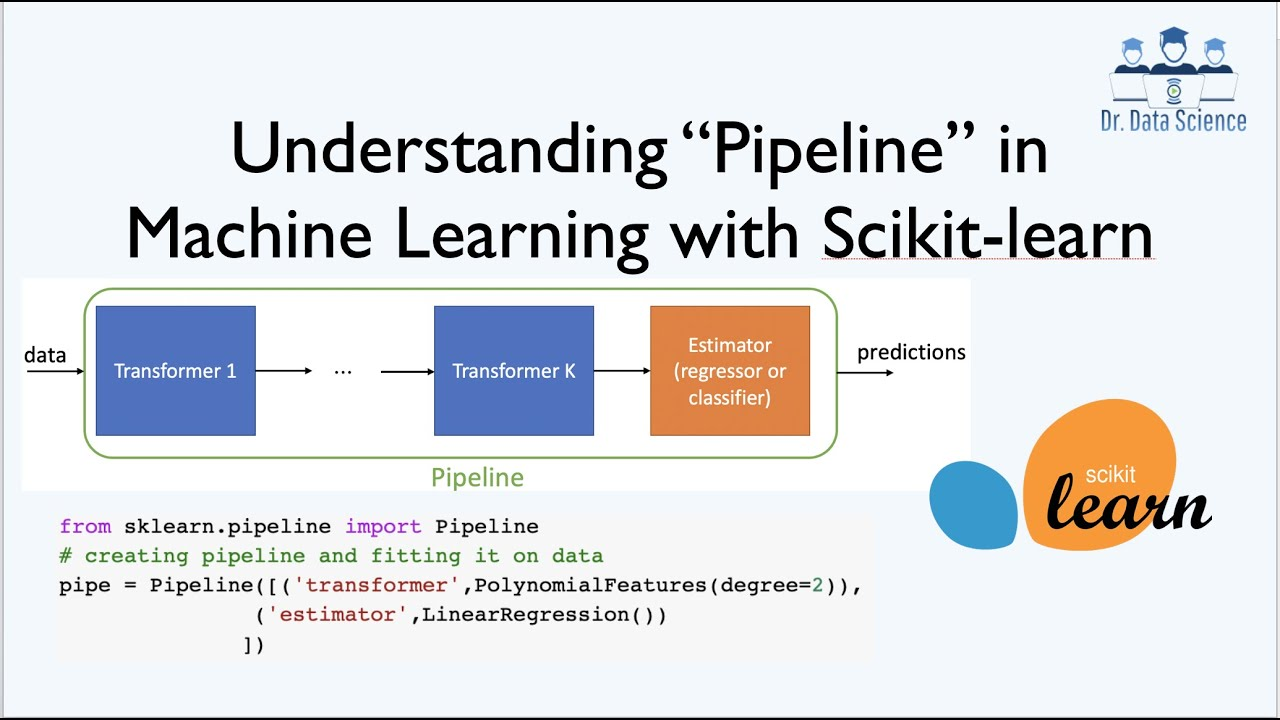

### Int√©gration dans une Pipeline de scikit-learn
La class PCA peut √™tre int√©gr√©e dans une Pipeline de scikit-learn.
Dans le cadre de notre exemple, nous cherchons √† pr√©dire la 8√®me variable (variable PRIX) √† partir des 6 premi√®res variables du jeu de donn√©es.
PRIX est une variable quantitative.
Pour la pr√©dire, nous allons utiliser un mod√®le de r√©gression lin√©aire multiple, qui prendra en input des axes issus d'une Analyse en Composantes Principales pratiqu√©e sur les donn√©es brutes.
Dans un premier temps, et de fa√ßon tout √† fait arbitraire, nous fixons le nombre de composantes extraites √† 4.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

GridSearchCV impl√©mente une m√©thode "fit" et une m√©thode "score". Il impl√©mente √©galement "score_samples", "predict", "predict_proba", "decision_function", "transform" et "inverse_transform" s'ils sont impl√©ment√©s dans l'estimateur utilis√©.

Les param√®tres de l'estimateur utilis√© pour appliquer ces m√©thodes sont optimis√©s par une recherche sur grille valid√©e par recoupement sur une grille de param√®tres.
https://runebook.dev/fr/docs/scikit_learn/modules/generated/sklearn.model_selection.gridsearchcv

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Construction de la Pipeline
# On enchaine une Analyse en Composantes Prnicipales (4 axes retenus) puis une r√©gression lin√©aire multiple
pipe = Pipeline([("pca", PCA(n_components=4, stats=False)), ("linear_regression", LinearRegression())])

In [ ]:
# Estimation du mod√®le
pipe.fit(X, y)

Pipeline(steps=[('pca', PCA(n_components=4, stats=False)),
                ('linear_regression', LinearRegression())])

In [ ]:
# Pr√©diction sur l'√©chantillon de test
print(pipe.predict(X))

[28778.47166651 35726.0600918  31011.95297996 28033.41003637
 37806.88571481 34114.82070564 34931.02152346 27901.90893024
 43330.89903245 24545.70725329 38661.65482425 34794.41267099
 44874.06372338 35323.75414906 33995.01296845 35061.73868418
 37741.70392817 28221.52111698]


Le param√®tre n_components peut faire l'objet d'une optimisation via GridSearchCV de scikit-learn.
Nous reconstruisons donc une Pipeline, sans sp√©cifier de valeur a priori pour n_components.

In [ ]:
# Reconstruction d'une Pipeline, sans sp√©cifier de valeur a priori pour n_components
pipe2 = Pipeline([("pca", PCA(stats=False)), ("linear_regression", LinearRegression())])

In [ ]:
# Estimation du mod√®le 2
pipe2.fit(X, y)

Pipeline(steps=[('pca', PCA(stats=False)),
                ('linear_regression', LinearRegression())])

In [ ]:
# Pr√©diction sur l'√©chantillon d'apprentissage
print(pipe2.predict(X))

[29616.10867236 36259.65464946 31411.14922499 26445.75074645
 37042.99657626 34972.83432923 33749.14462282 26579.9571656
 44445.57655539 24650.24125571 38270.46181151 34830.41842394
 44872.42274919 36343.488685   35638.06479235 32233.42043584
 37103.49511476 30389.81418915]


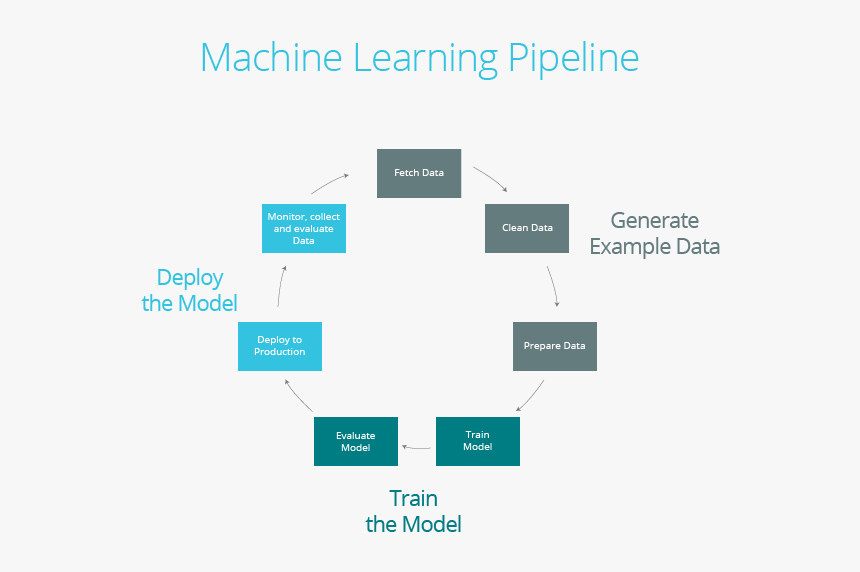

### Travail √† faire:

1- Evaluer le mod√®le √† travers les m√©triques ad√©quates

2- Pr√©dire le prix des voitures Peugeot 604 et Peugeot 304 S √† partir de leur caract√©ristique